In [41]:
try:
    passes += 1
except NameError:
    %cd ..
    passes = 1

In [42]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import logging
logging.basicConfig(level=logging.INFO)


Iris dataset
==

In [43]:
df_iris_orig = pd.read_csv("data/iris.csv")
df_iris = df_iris_orig.drop(columns=["species"])

In [44]:

c_iris = bb.CART(df=df_iris, y_name=None,
                 #X_names=["petal_length", "petal_width"],
                 algorithm_kwargs={"unsupervised_minimum_relative_entropy_improvement": -0.15},
                 metrics_type="clustering", max_depth=10, min_leaf_samples = 10)
c_iris.create_tree()
p = c_iris.predict(df_iris)
df_iris["species"] = p

sepal_length loss: -0.15025782525518672
petal_length loss: -0.16863776132510316
petal_width loss: -0.13935043004725742
sepal_length loss: -0.1840474270265033
sepal_width loss: -0.14044351177440367
petal_width loss: -1.0392472533430951e-12
sepal_length loss: -0.11866936510747746
sepal_width loss: -0.16034393482207043
petal_length loss: -0.1779594359572789
petal_width loss: -1.1731181205199941e-12
sepal_length loss: -0.1300995345448333
sepal_width loss: -0.16419430562070075
petal_length loss: -3.8032103325042577e-13
petal_width loss: -9.462870952809856e-13
sepal_length loss: -0.09980191693916261
petal_length loss: -3.9388642177283926e-13
petal_width loss: -9.764217078023972e-13
sepal_length loss: -0.1500113428300219
sepal_width loss: -0.14804095548588334
petal_length loss: -5.403392445674152e-12
petal_width loss: 0.0
sepal_length loss: -0.1611594428256738
petal_width loss: -0.20451470539014452
petal_width loss: -1.2523025330665174e-12
sepal_length loss: -0.11458901533073716
sepal_width l

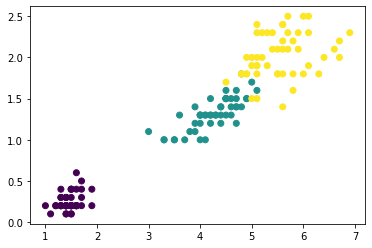

In [45]:
import matplotlib.pyplot as plt
#clusters = [n.value for n in c_iris.tree.nodes()]
clusters = [n for n in df_iris_orig["species"]]
unique = np.unique(clusters)
colors = {}
for i, u in enumerate(unique):
    colors[u] = i
plt.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))


In [46]:

x, y = np.meshgrid(np.linspace(1,7,101),np.linspace(0,8,101))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree.traverse(d).value)
unique = [u for u in np.unique(col)]
for i, c in enumerate(col):
    col[i] = unique.index(c)+5
z = np.array(col).reshape(x.shape)

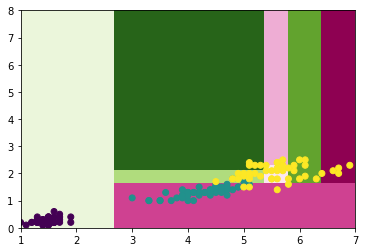

In [47]:
fig, ax = plt.subplots()
ax.pcolormesh(x,y,z, cmap=plt.get_cmap('PiYG'))
ax.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

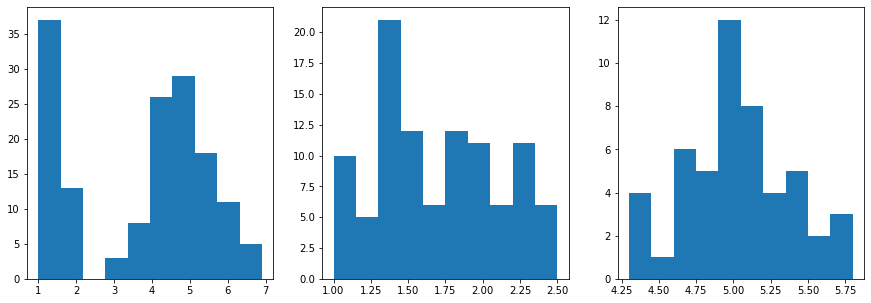

In [48]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(df_iris["petal_length"])
ax[1].hist(df_iris[df_iris["petal_length"]>=2.64]["petal_width"])
ax[2].hist(df_iris[df_iris["petal_length"]<2.64]["sepal_length"])

In [49]:
import binarybeech.utils
binarybeech.utils.print_tree(c_iris.tree)

petal_length<2.64
├── False:petal_width<1.66
│   ├── False:petal_length<5.36
│   │   ├── False:petal_length<5.78
│   │   │   ├── False:sepal_width<3.41
│   │   │   │   ├── False:cluster 4d6dd0a3-5f6d-4253-9f3d-5182b896edf5
│   │   │   │   └── True: petal_length<6.35
│   │   │   │       ├── False:cluster 09121667-c5d6-4151-9e13-8739882e8f26
│   │   │   │       └── True: cluster e2a1e393-c2ba-4664-be77-7d39aa27a0dc
│   │   │   └── True: sepal_width<2.98
│   │   │       ├── False:petal_width<2.29
│   │   │       │   ├── False:cluster 787cf5a5-6838-4be0-ac05-42dfd45ef4a6
│   │   │       │   └── True: cluster 82e777f8-b9e7-4c3b-b4c7-ddbc23eeb367
│   │   │       └── True: cluster fa0ddf6a-4484-4279-aae9-63f061237fcb
│   │   └── True: sepal_length<5.40
│   │       ├── False:sepal_length<6.14
│   │       │   ├── False:petal_width<2.12
│   │       │   │   ├── False:cluster f6e44efd-8684-40ad-a58a-688432285591
│   │       │   │   └── True: cluster d2f454bf-f164-4819-8a41-4b0b25184e06
│   │      

In [50]:
c_iris.validate()

{}